<center>Заметка 1.5  Базовые понятия машинного обучения, регрессия.</center>
<center>курса <q>Введение в машинное обучение</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.11</center>

<center>Аннотация</center>
<p>
Вводятся базовые элементы пакета линейной алгебры (Numpy) относфщейся к питону (Python версии 3.xx). Конкретно речь идет о алгебре и, соотвествено, линейной регресии.
Последнее, в частности, используется для ввода ключевых понятий из машинного обучения: выборка, обучающее множество, тестовое/валидационное множество, поиск "оптимального" решения и регуляризация. Уровни значимости (F-статистика) при построении регрессий (statmodels). 
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

<b>Отрисовка кривой</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Для начала случайно сгенерируем точки в которых будет вычислена функция.
np.random.uniform(10, 20, 5)  # Создаем матрицу равномерных распределений. Первые два числа казывают диапазон.

array([10.05883074, 17.73304573, 12.71185369, 15.44752132, 12.49656279])

In [3]:
x = np.random.uniform( 3, 10, 10 ) # 10 точек на отрезке [3, 10]

In [4]:
x

array([6.65771569, 6.50170589, 3.77197208, 9.43421992, 9.20279068,
       8.63828662, 7.2352993 , 4.97128899, 3.64077699, 7.46958444])

In [5]:
x.shape # Это действительно массив из 10 чисел.

(10,)

In [6]:
y = x * 2 - 15 # Вычисляем значение в каждой из точек. Функция линейная.

In [7]:
y

array([-1.68456862, -1.99658821, -7.45605585,  3.86843985,  3.40558136,
        2.27657325, -0.52940139, -5.05742203, -7.71844602, -0.06083113])

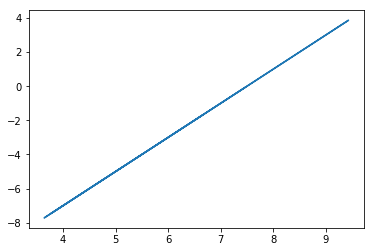

In [8]:
plt.plot( x, y )

In [9]:
yy = y + np.random.randn(10) # Добавим шум к каждому значению (измерению)

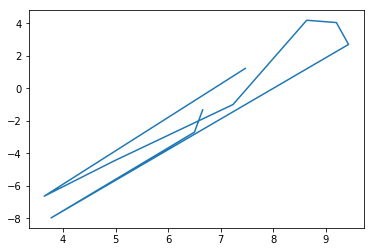

In [10]:
plt.plot( x, yy ) # Кривая как-то странно выглядит.

In [11]:
xx = np.sort( x ) # Дело в том, что необходимо отсортировать числа по оси x.
yy = xx * 2 - 15 + np.random.randn(10) # Теперь заново вычисляем.

In [12]:
yy.shape, x.shape # Массивы соответсвуют друг другу по размеру.

((10,), (10,))

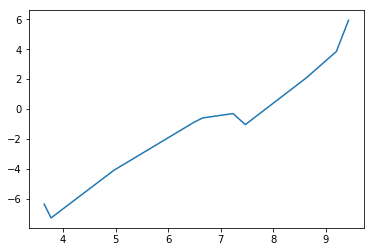

In [13]:
plt.plot( xx, yy )

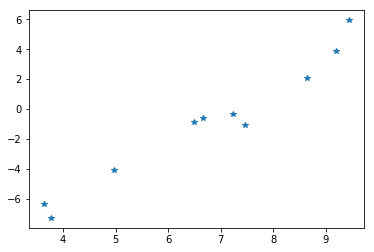

In [14]:
plt.plot( xx, yy, '*' )

<b>Линейные уравнения.</b>

In [15]:
# Решаем систему уравнений.
a = np.array( [ [2, -1], [1, 3] ] ) # 2x  -y = 9
b = np.array( [ 9, 8] ) #             1x +3y = 8
x = np.linalg.solve(a, b)
x

array([5., 1.])

In [16]:
np.dot(a, x)

array([9., 8.])

In [17]:
np.allclose(np.dot(a, x), b) # Проверяем на равенство с учетом машинного эпсилон, т.е. числа могуть чуть отличаться.

True

In [18]:
5 - np.sqrt( 5 ) ** 2 # Например, должны были получить 0, но жизнь иначе распорядилась.

-8.881784197001252e-16

In [28]:
np.allclose( 5 , np.sqrt( 5 ) ** 2 )

True

In [29]:
np.allclose( 5 - 0.1 , np.sqrt( 5 ) ** 2 )

False

In [30]:
# Можно вычислить и обратную матрицу в явном виде
# a = np.array( [ [2, -1], [1, 3] ] )
ainv = np.linalg.inv( a )
ainv

array([[ 0.42857143,  0.14285714],
       [-0.14285714,  0.28571429]])

In [31]:
# Решаем систему. Для этого используем произведение вектора на матрицу:
ainv.dot( b ) # Получили тот же ответ, что и раньше.

array([5., 1.])

In [32]:
# Можно умножить и на матрицу. Тогда произведение матрицы на её обратное должно дать единичную.
np.allclose( np.dot(a, ainv), np.eye(2) )

True

<b>Линейная регрессия</b>

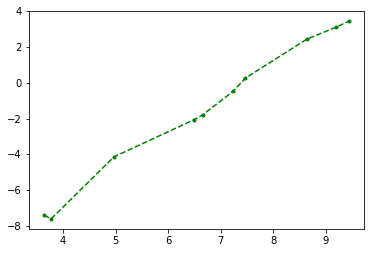

In [33]:
yy = xx * 2 - 15 + np.random.randn(10)/2 # Тоже самое но с меньшим шумом.
plt.plot( xx, yy, 'g.--') # Цвет зеленый, соединения пунктиром, точки маленькие.

In [35]:
qq = np.array([1,2,3,4,5,6,7,8,9])
qq

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
qq.reshape(3,3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [37]:
qq.reshape(9,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [20]:
q=xx.reshape(10,1) # Превращяем массив в вектор столбец, т.е. массив массивов (из одного элемента).
q

array([[ 3.13071586],
       [ 3.50991847],
       [ 3.67672641],
       [ 6.36378286],
       [ 6.98019215],
       [ 7.26607565],
       [ 7.60479043],
       [ 7.65864121],
       [ 8.35240281],
       [ 8.46699461]])

In [21]:
np.ones(10).reshape(10,1) # Создаем вектор столбец единиц.

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [22]:
A = np.concatenate( [np.ones((10,1)), q ], axis=1 ) # Создаем общую матрицу. Присваеваем её переменной A.
A

array([[ 1.        ,  3.13071586],
       [ 1.        ,  3.50991847],
       [ 1.        ,  3.67672641],
       [ 1.        ,  6.36378286],
       [ 1.        ,  6.98019215],
       [ 1.        ,  7.26607565],
       [ 1.        ,  7.60479043],
       [ 1.        ,  7.65864121],
       [ 1.        ,  8.35240281],
       [ 1.        ,  8.46699461]])

In [23]:
xx

array([ 3.13071586,  3.50991847,  3.67672641,  6.36378286,  6.98019215,
        7.26607565,  7.60479043,  7.65864121,  8.35240281,  8.46699461])

In [24]:
AA = np.linalg.pinv(A) # Вычисляем псевдо обратную матрицу от A. Метод решения обычных систем не годится.
AA

array([[ 0.61795917,  0.55600574,  0.52875296,  0.08974658, -0.01096125,
        -0.05766837, -0.11300698, -0.12180502, -0.23515052, -0.25387232],
       [-0.08220238, -0.0723701 , -0.06804497,  0.00162726,  0.01761003,
         0.02502266,  0.03380514,  0.03520142,  0.05318985,  0.05616108]])

In [25]:
d = AA.dot( yy.reshape(10,1) ) # Теперь её используем для решения системы.
d # В общем параметры приблизительно правельные.

array([[-15.53182094],
       [  2.02795279]])

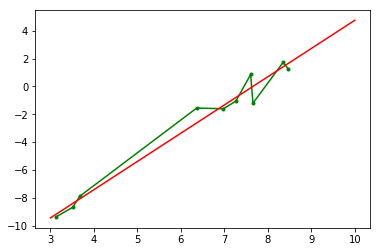

In [26]:
p = np.linspace(3, 10, 100) # Отрисуем получившуюся прямую. Используем для этого 100 точек.
yyy = p*d[1] + d[0] # Параметры вычисленной линии хранятся в переменной d.
plt.plot( xx, yy, 'g.-', p, yyy, 'r-')

In [27]:
# Какая точность этого приближения?
xx[0]*d[1] + d[0], yy[0] # В даннойт точк значения вычисленные и табулированые:

(array([-9.18287699]), -9.3716278498947432)

In [28]:
(xx[0]*d[1] + d[0])[0], yy[0]

(-9.1828769931181782, -9.3716278498947432)

In [29]:
for i in range(xx.shape[0]): # Цикл пробегает по всем нашим точкам
    print ( xx[i]*d[1] + d[0], yy[i] ) # Выводит два значения: вычисленное и табулированное.

[-9.18287699] -9.37162784989
[-8.41387199] -8.69202561681
[-8.07559336] -7.88649969703
[-2.62636975] -1.55849187324
[-1.3763208] -1.60711592976
[-0.79656257] -1.05958337286
[-0.10966499] 0.855081331181
[-0.00045814] -1.2064845481
[ 1.40645762] 1.72387889541
[ 1.63884438] 1.2664520568


In [30]:
xx.shape[0], len(xx) 

(10, 10)

In [31]:
def evalLine(d, x): # Создадим функцию, которая по параметрам прямой (d) считаем значение в точке (x).
    return x * d[1] + d[0]

In [32]:
evalLine( d, xx[0]) # Вычислим значение в точке.
# Значение согласуется с предыдущими результатами.

array([-9.18287699])

In [33]:
# Посчитаем среднею ошибку по всем точкам.
sum1 = 0. # Линейная ошибка.
sum2 = 0. # Квадратичная ошибка.
for i in range(xx.shape[0]):
    err = evalLine( d, xx[i]) - yy[i]
    sum1 += err
    sum2 += err * err
    print ( xx[i]*d[1] + d[0], err )
print( "integral sum = ", sum1/xx.shape[0], sum2/xx.shape[0] )

[-9.18287699] [ 0.18875086]
[-8.41387199] [ 0.27815362]
[-8.07559336] [-0.18909366]
[-2.62636975] [-1.06787787]
[-1.3763208] [ 0.23079513]
[-0.79656257] [ 0.2630208]
[-0.10966499] [-0.96474632]
[-0.00045814] [ 1.2060264]
[ 1.40645762] [-0.31742128]
[ 1.63884438] [ 0.37239232]
integral sum =  [  4.61852778e-15] [ 0.40362297]


ДЗ1 Почему сумма ошибка почти равна нулю? 

In [34]:
# Обособим данный подсчет в функцию.
def errLine(d, x, y): # По параметрам прямой (d) и точкам (x,y) вычислим общую ошибку.
    sum1 = 0.
    sum2 = 0.
    for i in range(x.shape[0]):
        err = evalLine( d, x[i]) - y[i]
        sum1 += err
        sum2 += err * err
    return sum1/x.shape[0], sum2/x.shape[0]

In [35]:
errLine(d, xx, yy)

(array([  4.61852778e-15]), array([ 0.40362297]))

In [36]:
# Обособим код вычисляющий линейную регрессию в функцию.
def fitLin(x, y): # x, y задают данные. На выходе параметры линейной регрессии.
    sz = x.shape[0]
    A = np.concatenate( [np.ones((sz,1)), x.reshape( sz, 1) ], axis=1 )
    Ai=np.linalg.pinv(A)
    return Ai.dot( y.reshape(sz,1) )

In [37]:
d0 = fitLin( xx, yy) # Проверим, что соответсвует редыдущим результатам.
d0

array([[-15.53182094],
       [  2.02795279]])

In [38]:
errLine(d0, xx, yy)

(array([  4.61852778e-15]), array([ 0.40362297]))

<b>Learn and Test</b>

In [39]:
perm = np.random.permutation( xx.shape[0] ) # Создаем перестановку числе от 0 до xx.shape[0] не включительно.
perm

array([5, 2, 6, 7, 9, 4, 3, 1, 0, 8])

In [40]:
#np.random.randint(0, xx.shape[0], 5)
ii = perm[:5] # Берем первые 5 чисел.
ii

array([5, 2, 6, 7, 9])

In [41]:
d1 = fitLin( xx[ii], yy[ii]) # Вычисляем параметры линейной регрессии для подмножества числе (ii)
d1

array([[-14.9284905 ],
       [  1.92111959]])

In [42]:
ee = errLine(d1, xx[ii], yy[ii]) # Вычисляем ошибку на подмножестве.
ee

(array([  2.75335310e-15]), array([ 0.47479719]))

In [44]:
jj=perm[5:]

In [45]:
errLine(d1, xx[jj], yy[jj]) # Вычисляем ошибку на всем множестве точек.

(array([-0.13965618]), array([ 0.43023651]))

In [46]:
def experimentLin(n, d, p, k ):
    x = np.random.uniform( 3, 10, (n) )
    y = d[1] * x + d[0] + np.random.randn( x.shape[0] )/2
    d0 = fitLin( x, y)
    e0 = errLine(d0, x, y)
    
    ee10 = np.array([0.])
    ee11 = np.array([0.])
    for j in range(k):
        perm = np.random.permutation( xx.shape[0] )
        ii = perm[:int(x.shape[0] * p)]#np.random.randint(0, x.shape[0], int(x.shape[0] * p) )
        d1 = fitLin( x[ii], y[ii])
        e1 = errLine(d1, x, y)
        ee10 += e1[0]
        ee11 += e1[1]
    print( e0, [ee10 / k, ee11 / k] )

In [47]:
experimentLin(10, np.array([-15, 2.5]), 0.85, 1000)

(array([  1.79856130e-15]), array([ 0.18388544])) [array([-0.00776819]), array([ 0.19548702])]


ДЗ2: Построить статистику для ошибки. Вычислить её аналетически. 

<b>Polynomial</b>

In [49]:
# Рассмотрим случай полиномов. Тонее на них мы изучим другое важное поянтие машинного обучения. Регулиризация.
import numpy.polynomial.polynomial as poly

In [51]:
d

array([[-15.53182094],
       [  2.02795279]])

In [52]:
poly.polyval(xx[0], d ) # Оказывается есть функция poly.polyval которая умеет вычилсять значение полинома.

array([-9.18287699])

In [53]:
xx.shape[0]

10

In [54]:
x.shape[0]

2

In [55]:
ee[0]

array([  2.75335310e-15])

In [56]:
d = np.array( [-10, -28, 2.2] ) # Параметры задающие параболу.

In [57]:
n = 10
x = np.random.uniform( 3, 10, (n) )
x = np.sort( x )
x

array([ 3.0572528 ,  4.22041965,  4.5656806 ,  4.75569728,  6.31594816,
        7.18261337,  7.44355101,  7.99168206,  8.05083787,  9.3153561 ])

In [58]:
y = poly.polyval(x, d ) + np.random.randn( x.shape[0] )/2

In [59]:
y

array([-75.24504601, -88.84300539, -93.07381884, -93.17293408,
       -98.86706805, -97.48554213, -96.89531226, -92.73166304,
       -92.47643078, -79.81368289])

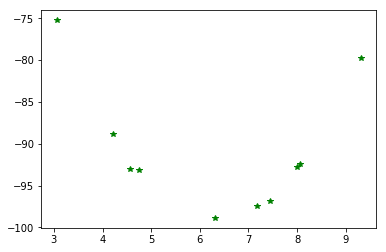

In [60]:
plt.plot( x, y, 'g*')

In [61]:
dd = poly.polyfit( x, y, x.shape[0] - 2 ) # Есть библиотечная функция для вычисления полиномиальной регрессии.
dd

array([ -9.14843261e+04,   1.31900187e+05,  -8.15094806e+04,
         2.82217259e+04,  -5.99692403e+03,   8.01829578e+02,
        -6.59507152e+01,   3.05383388e+00,  -6.10022147e-02])

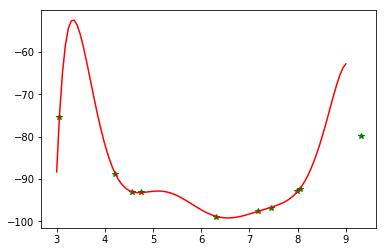

In [62]:
p = np.linspace(3, 9, 100) # Построим вычисленую кривую.
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )

In [63]:
q = x.reshape( n, 1) # Решим эту же задачу вручную.
q

array([[ 3.0572528 ],
       [ 4.22041965],
       [ 4.5656806 ],
       [ 4.75569728],
       [ 6.31594816],
       [ 7.18261337],
       [ 7.44355101],
       [ 7.99168206],
       [ 8.05083787],
       [ 9.3153561 ]])

In [64]:
q**2

array([[  9.34679469],
       [ 17.81194201],
       [ 20.84543934],
       [ 22.61665659],
       [ 39.89120122],
       [ 51.58993479],
       [ 55.40645157],
       [ 63.86698208],
       [ 64.81599037],
       [ 86.77585919]])

In [65]:
A = np.concatenate( [np.ones((n,1)), q, q**2, q**3, q**4, q**5, q**6, q**7, q**8], axis=1 )

In [66]:
Ai = np.linalg.pinv( A )
dd = Ai.dot( y.reshape(n, 1) )
dd = dd.reshape( dd.shape[0] )
dd #, dd.shape
#print( A.shape, Ai.shape, n )

array([ -9.14849760e+04,   1.31901245e+05,  -8.15102154e+04,
         2.82220105e+04,  -5.99699135e+03,   8.01839538e+02,
        -6.59516163e+01,   3.05387950e+00,  -6.10032050e-02])

In [67]:
AA = A.transpose().dot( A )
AAinv = np.linalg.inv( AA )
AApinv = AAinv.dot( A.transpose() )
#print( A.shape, AAinv.shape, AApinv.shape )
dd = AApinv.dot( y.reshape(n, 1) )
dd = dd.reshape( dd.shape[0] )
dd, dd.shape

(array([ -2.75383194e+06,   4.01002150e+06,  -2.49640119e+06,
          8.70973626e+05,  -1.86534445e+05,   2.51382240e+04,
         -2.08379113e+03,   9.72247521e+01,  -1.95639996e+00]), (9,))

In [68]:
AApinv2, residuals, rank, s= np.linalg.lstsq( A, y )
AApinv2

array([ -9.14849760e+04,   1.31901245e+05,  -8.15102154e+04,
         2.82220105e+04,  -5.99699135e+03,   8.01839538e+02,
        -6.59516163e+01,   3.05387950e+00,  -6.10032050e-02])

In [69]:
residuals, rank # Сумма ошибок отклонения. И ранг.

(array([ 0.23395286]), 9)

In [70]:
s # Собственные значения.

array([  6.32314648e+07,   5.18014245e+05,   6.09109321e+03,
         2.32426723e+02,   1.00016092e+01,   7.54522409e-01,
         2.32108582e-02,   3.20792439e-04,   5.11745015e-06])

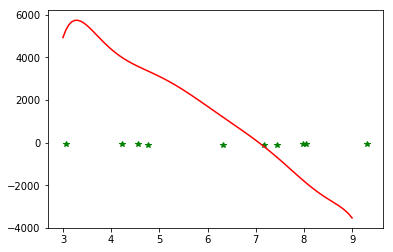

In [71]:
p = np.linspace(3, 9, 100)
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )
# Получилась очень страная кривая. Ветви параболы направлены вниз. Через точки почти не проходит

In [85]:
AA = A.transpose().dot( A )
AA = AA  + 150 * np.eye( AA.shape[0] ) # Добавляем регулиризацию.
AAinv = np.linalg.inv( AA )
AApinv = AAinv.dot( A.transpose() )
#print( A.shape, AAinv.shape, AApinv.shape )
dd = AApinv.dot( y.reshape(n, 1) )
dd = dd.reshape( dd.shape[0] )
dd, dd.shape

(array([ -1.17649310e-01,  -2.92658845e-01,  -6.40139204e-01,
         -1.10181211e+00,  -1.06525697e+00,   4.63912291e-01,
         -5.96699658e-02,   2.62716012e-03,  -1.14889242e-05]), (9,))

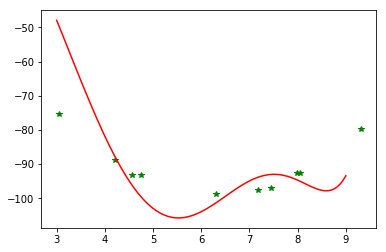

In [86]:
p = np.linspace(3, 9, 100)
plt.plot( x, y, 'g*', p, poly.polyval(p, dd ), 'r-' )

In [87]:
AA = A.transpose().dot( A )
U, s, V = np.linalg.svd( AA )
s # Собственые значения. Очень большой порядок их изменения.

array([  3.99821814e+15,   2.68338758e+11,   3.71014165e+07,
         5.40221817e+04,   1.00032170e+02,   5.69341308e-01,
         5.41007185e-04,   4.44617914e-05,   3.54404135e-08])

In [88]:
s[0]/s[-1] # Собственные значения отсортированы. Делим наибольшее на наименьшее.

1.1281522249967035e+23

In [90]:
AA = AA  + 150 * np.eye( AA.shape[0] )
U, s, V = np.linalg.svd( AA )
s

array([  3.99821814e+15,   2.68338758e+11,   3.71015680e+07,
         5.41736817e+04,   2.51532213e+02,   1.52069258e+02,
         1.51500543e+02,   1.51500035e+02,   1.51499986e+02])

In [91]:
s[0]/s[-1] # Порядок существенно уменьшен, хотя всеравно большой. np.trace?linalg.norm

26390881266437.051

In [92]:
a = np.array( [ [1, -2], [1, -2] ] )
U, s, V = np.linalg.svd(a, full_matrices=True)
U.shape, V.shape, s.shape

((2, 2), (2, 2), (2,))

In [93]:
print( U )
print( V )
print( s )

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[-0.4472136   0.89442719]
 [ 0.89442719  0.4472136 ]]
[  3.16227766e+00   4.24340278e-17]


In [94]:
S = np.diag( s )

In [95]:
np.allclose(a, np.dot(U, np.dot(S, V)))

True

<b>Произведение векторов</b>

In [96]:
# Скаляроне произведение.
a = np.array([ 1, 2, 3])
b = np.array([ -1, 0, 2])
np.inner( a, b) # Скяларное произведение

5

In [98]:
np.sum( a * b ) # Но можно и так.

5

In [97]:
a * b # Поэлементное произведение векторов.

array([-1,  0,  6])

In [99]:
b

array([-1,  0,  2])

In [100]:
# Комплексные числа.
1 + 2j

(1+2j)

In [101]:
(1 + 2j) * (3 + 4j) # 1*3 + 1*4j + 2j*3 + 2j*4j = 3 + 4j + 6j + 8jj = -5 + 10j

(-5+10j)

In [104]:
# Сопряженное скалярное произведение.
a = np.array([ 1 + 2j, 3 + 4j])
b = np.array([ 1 - 2j, 3 + 4j])
np.vdot(a, b)

(22-4j)